In [1]:
import matplotlib.pyplot as plt # plotting
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
pd.set_option('display.max_columns', None)
%matplotlib inline

In [25]:
column_names = ['FL_DATE', 'OP_CARRIER', 'OP_CARRIER_FL_NUM', 'ORIGIN', 'DEST',
       'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY', 'TAXI_OUT', 'WHEELS_OFF',
       'WHEELS_ON', 'TAXI_IN', 'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY',
       'CANCELLED', 'DIVERTED', 'CRS_ELAPSED_TIME', 'ACTUAL_ELAPSED_TIME',
       'AIR_TIME', 'DISTANCE', 'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY',
       'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY', 'Day', 'Year','Month']

In [26]:
# ml_visual = pd.read_parquet('./Dataset/dataset_visualization.parquet', engine='pyarrow')
# # ml_dataset = spark.read.parquet("./Dataset/dataset_visualization.parquet")
# count = ml_visual.shape[0]
# print(count)

In [27]:
ml_visual = pd.read_csv("./Dataset/mapred_vis_data.csv",names=column_names)

In [28]:
ml_visual.dtypes

FL_DATE                 object
OP_CARRIER              object
OP_CARRIER_FL_NUM        int64
ORIGIN                  object
DEST                    object
CRS_DEP_TIME             int64
DEP_TIME               float64
DEP_DELAY              float64
TAXI_OUT               float64
WHEELS_OFF             float64
WHEELS_ON              float64
TAXI_IN                float64
CRS_ARR_TIME             int64
ARR_TIME               float64
ARR_DELAY              float64
CANCELLED              float64
DIVERTED               float64
CRS_ELAPSED_TIME       float64
ACTUAL_ELAPSED_TIME    float64
AIR_TIME               float64
DISTANCE               float64
CARRIER_DELAY          float64
WEATHER_DELAY          float64
NAS_DELAY              float64
SECURITY_DELAY         float64
LATE_AIRCRAFT_DELAY    float64
Day                      int64
Year                     int64
Month                    int64
dtype: object

In [29]:
ml_visual.drop([0],axis=0,inplace=True)

In [30]:
ml_visual.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5579410 entries, 1 to 5579410
Data columns (total 29 columns):
 #   Column               Dtype  
---  ------               -----  
 0   FL_DATE              object 
 1   OP_CARRIER           object 
 2   OP_CARRIER_FL_NUM    int64  
 3   ORIGIN               object 
 4   DEST                 object 
 5   CRS_DEP_TIME         int64  
 6   DEP_TIME             float64
 7   DEP_DELAY            float64
 8   TAXI_OUT             float64
 9   WHEELS_OFF           float64
 10  WHEELS_ON            float64
 11  TAXI_IN              float64
 12  CRS_ARR_TIME         int64  
 13  ARR_TIME             float64
 14  ARR_DELAY            float64
 15  CANCELLED            float64
 16  DIVERTED             float64
 17  CRS_ELAPSED_TIME     float64
 18  ACTUAL_ELAPSED_TIME  float64
 19  AIR_TIME             float64
 20  DISTANCE             float64
 21  CARRIER_DELAY        float64
 22  WEATHER_DELAY        float64
 23  NAS_DELAY            float64
 24

In [31]:
ml_visual.shape

(5579410, 29)

In [32]:
ml_visual.isnull().sum()

FL_DATE                0
OP_CARRIER             0
OP_CARRIER_FL_NUM      0
ORIGIN                 0
DEST                   0
CRS_DEP_TIME           0
DEP_TIME               0
DEP_DELAY              0
TAXI_OUT               0
WHEELS_OFF             0
WHEELS_ON              0
TAXI_IN                0
CRS_ARR_TIME           0
ARR_TIME               0
ARR_DELAY              0
CANCELLED              0
DIVERTED               0
CRS_ELAPSED_TIME       0
ACTUAL_ELAPSED_TIME    0
AIR_TIME               0
DISTANCE               0
CARRIER_DELAY          0
WEATHER_DELAY          0
NAS_DELAY              0
SECURITY_DELAY         0
LATE_AIRCRAFT_DELAY    0
Day                    0
Year                   0
Month                  0
dtype: int64

## Correlation between Features & Label:

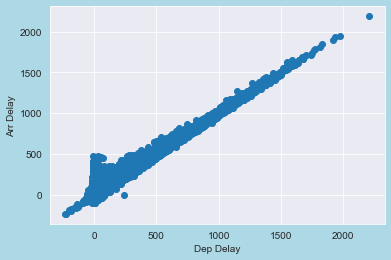

In [33]:
plt.scatter(ml_visual.DEP_DELAY , ml_visual.ARR_DELAY)
plt.xlabel('Dep Delay')
plt.ylabel('Arr Delay')
plt.show()

## Linear relation between Dep Delay and Arr Delay

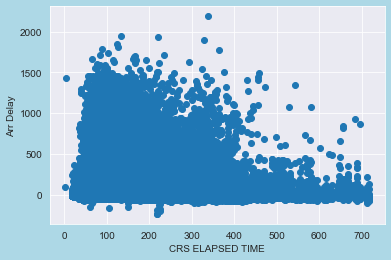

In [34]:
plt.scatter(ml_visual.CRS_ELAPSED_TIME , ml_visual.ARR_DELAY)
plt.xlabel('CRS ELAPSED TIME')
plt.ylabel('Arr Delay')
plt.show()

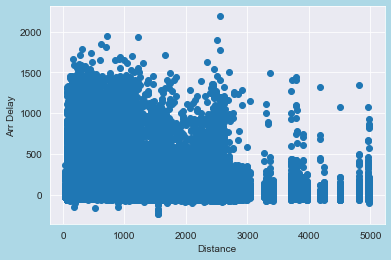

In [35]:
plt.scatter(ml_visual.DISTANCE , ml_visual.ARR_DELAY)
plt.xlabel('Distance')
plt.ylabel('Arr Delay')
plt.show()

## Delays is decresed with long distances

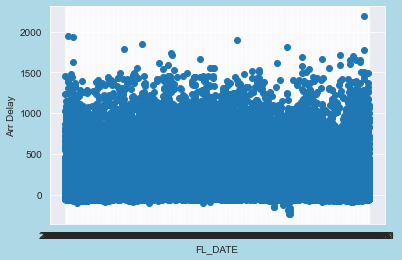

In [36]:
plt.scatter(ml_visual.FL_DATE , ml_visual.ARR_DELAY)
plt.xlabel('FL_DATE')
plt.ylabel('Arr Delay')
plt.show()

## Almost same distribution all over months/days

### Percent for each Carrier over all dataset:

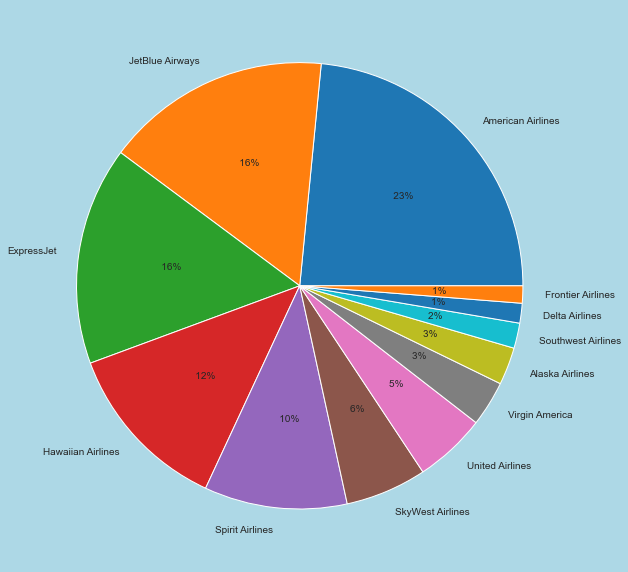

In [37]:
axis = plt.subplots(figsize=(10,14))
Name = ml_visual["OP_CARRIER"].unique()
size = ml_visual["OP_CARRIER"].value_counts()
plt.pie(size,labels=Name,autopct='%5.0f%%')
plt.show()

In [38]:
status = np.zeros(ml_visual.shape[0])
status[ml_visual["ARR_DELAY"] >0]=1

In [39]:
ml_visual['Status'] = status
ml_visual.Status.value_counts(normalize=True)

## As seen no values for Cancelled flights

0.0    0.651478
1.0    0.348522
Name: Status, dtype: float64

In [40]:
def status_data_distribution(data):
    case_count = ml_visual['Status'].value_counts()
    print('Legend:')
    print(case_count)
    
    plt.figure(figsize=(10,6))
    sns.barplot(x=case_count.index, y=case_count.values)
    plt.rcParams["figure.facecolor"] = "lightblue"
    plt.title('Data Distribution', fontsize=16)
    plt.xlabel('Flight Status', fontsize=12)
    plt.ylabel('Number of Flights', fontsize=12)
    plt.xticks(range(len(case_count.index)), ['ON TIME(0)', 'DELAYED(1)'])
    plt.show()

Legend:
0.0    3634863
1.0    1944547
Name: Status, dtype: int64


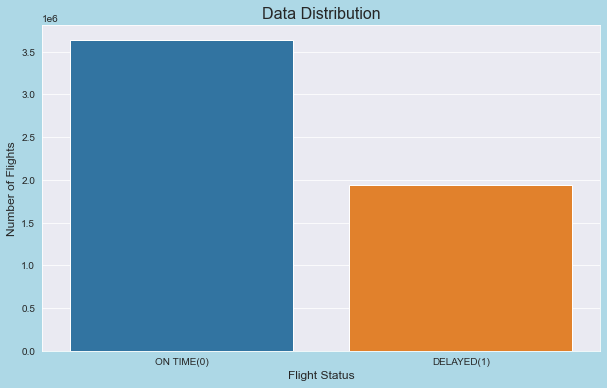

In [41]:
# check On-time / Delay data distribution
status_data_distribution(ml_visual)

In [42]:
ml_visual['flight_name'] = ml_visual['OP_CARRIER'].astype('category')
ml_visual['Month'] = ml_visual['Month'].astype('category')

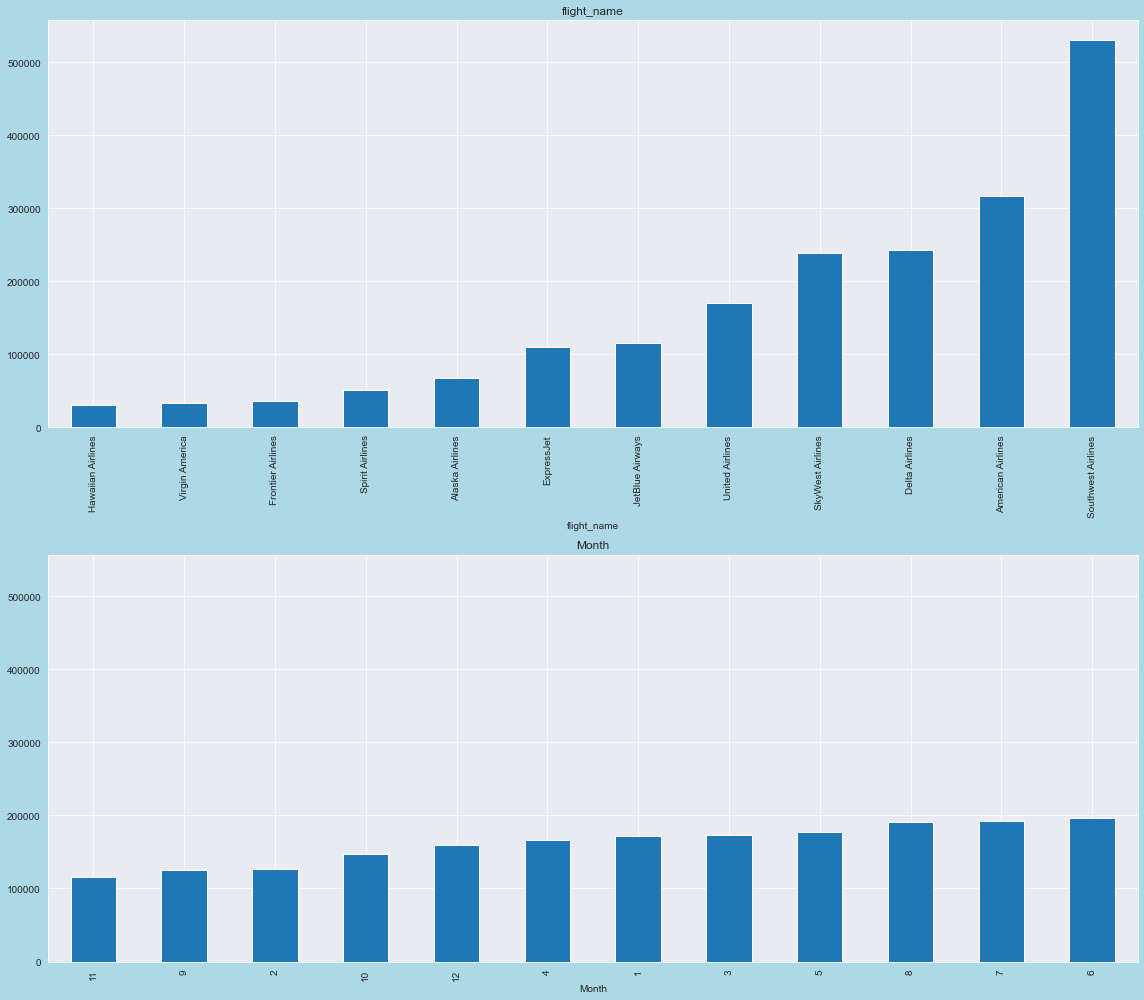

In [43]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(16,14), sharey=True)

categoricals = ['flight_name','Month']

for col, ax in zip(categoricals, axes.flatten()):
    (ml_visual.groupby(col).sum()['Status'].sort_values().plot.bar(ax=ax))
    
    ax.set_title(col)
    
fig.tight_layout()

## Show most Airports having delays (Arrival , Departure , etc)

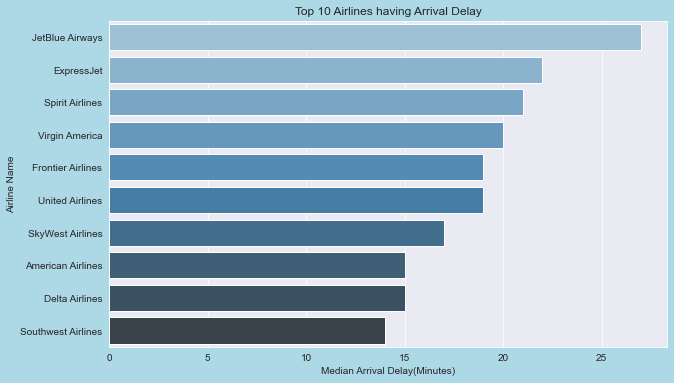

In [44]:
airline_arr = ml_visual[ml_visual['ARR_DELAY']>0]
airline_arr = airline_arr[['flight_name','ARR_DELAY']]
airline_arr = airline_arr.groupby(['flight_name'])['ARR_DELAY'].median().reset_index()
airline_arr = airline_arr.sort_values(by='ARR_DELAY', ascending=False, na_position='first').head(10)

plt.figure(figsize=(10,6))
sns.barplot(x='ARR_DELAY', 
            y='flight_name', 
            data=airline_arr, 
            order=airline_arr.sort_values('ARR_DELAY',ascending = False).flight_name,
           palette="Blues_d")
plt.ylabel('Airline Name')
plt.xlabel('Median Arrival Delay(Minutes)')
plt.title('Top 10 Airlines having Arrival Delay')
plt.show()

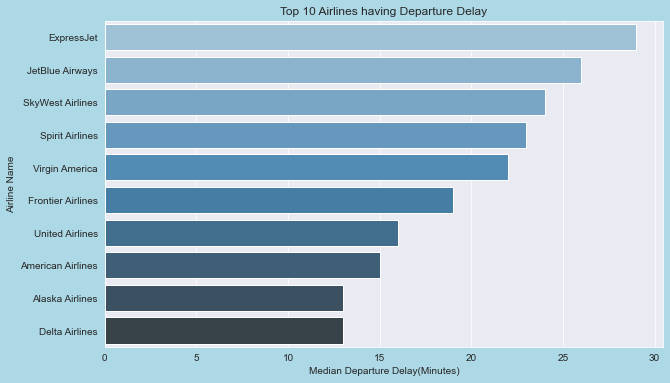

In [45]:
airline_dept = ml_visual[ml_visual['DEP_DELAY']>0]
airline_dept = airline_dept[['flight_name','DEP_DELAY']]
airline_dept = airline_dept.groupby(['flight_name'])['DEP_DELAY'].median().reset_index()
airline_dept = airline_dept.sort_values(by='DEP_DELAY', ascending=False, na_position='first').head(10)

plt.figure(figsize=(10,6))
sns.barplot(x='DEP_DELAY', 
            y="flight_name", 
            data=airline_dept, 
            order=airline_dept.sort_values('DEP_DELAY',ascending = False).flight_name,
           palette="Blues_d")
plt.ylabel('Airline Name')
plt.xlabel('Median Departure Delay(Minutes)')
plt.title('Top 10 Airlines having Departure Delay')
plt.show()

## 

In [39]:
delta_arr_time =  ml_visual.ARR_TIME - ml_visual.CRS_ARR_TIME 
data = pd.DataFrame()
print(data.shape)


(0, 0)
